# Identical analysis of delta's but combined all the years into one dataframe

In [1]:
import pandas as pd
import pandas_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline
import scipy.stats as stats
import numpy as np


/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/Users/davidchung/.pyenv/versions/3.6.0/lib/python3.6/site-packages/pandas/compat/__init__.py:84: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [16]:
df_2018=pd.read_excel('data/2018comp.xlsx')
df_2019=pd.read_excel('data/2019comp.xlsx')
df_2020=pd.read_excel('data/2020comp.xlsx')

In [17]:
df_delta.shape

(17470, 12)

In [18]:
 df_delta=pd.concat([df_2018,df_2019,df_2020], ignore_index=True)

In [19]:
df_delta.head(2)

,comp_pct,delta_avg_hr_pay,delta_conversion_pct,delta_footwear_units_pct,delta_multi_amt_pct,delta_star,delta_strak_hrs,delta_tot_avg_tenure_days,delta_traffic,delta_nonfootwear_units_pct,delta_accessory_units_pct,delta_multi_units
0,2.875502,-6.514947,0.005078,0.158067,0.240362,1.431988,38.76,350,254,-0.158067,-0.008065,17
1,2.491919,1.926238,0.025587,-0.025118,0.159759,2.601837,37.29,-520,440,0.021572,0.001916,33


In [20]:
df1=df_delta[['comp_pct', 'delta_multi_units','delta_accessory_units_pct', 'delta_avg_hr_pay', 'delta_conversion_pct', 'delta_footwear_units_pct', 'delta_multi_amt_pct', 'delta_star',
              'delta_strak_hrs', 'delta_tot_avg_tenure_days', 'delta_traffic','delta_nonfootwear_units_pct','delta_accessory_units_pct']]

In [21]:
pearsoncorr=df1.corr(method='pearson')

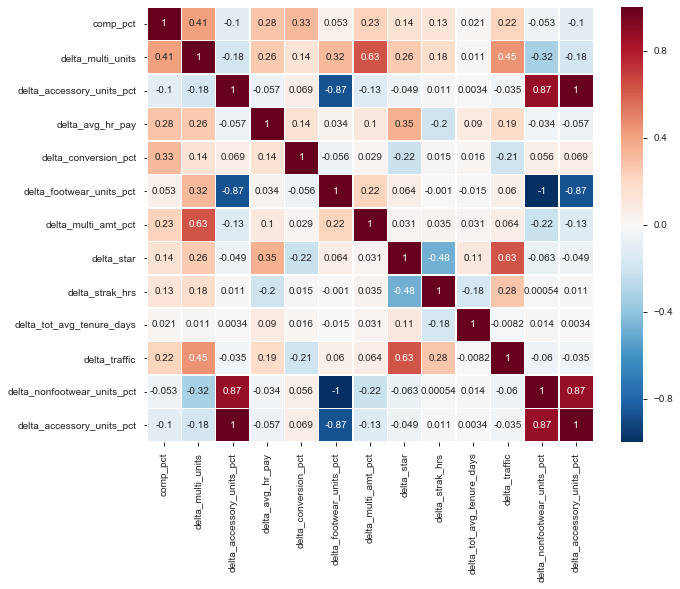

In [22]:
plt.subplots(figsize=(10,8))
ax=sns.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

In [23]:
df_delta=df_delta.sort_values(by='comp_pct',ascending=False)

In [24]:
pos_df_delta=df_delta[df_delta['comp_pct']>=0]
neg_df_delta=df_delta[df_delta['comp_pct']<0]

In [25]:
print(pos_df_delta.shape,neg_df_delta.shape)

(9125, 12) (8345, 12)


In [121]:
#top 50 percent
pos_df_delta_50=pos_df_delta.iloc[:4562]
#bottom 50 percent
neg_df_delta_50=neg_df_delta.iloc[-4172:]

#top 25 percent
pos_df_delta_25=pos_df_delta.iloc[:2281]
#bottom 25 percent
neg_df_delta_25=neg_df_delta.iloc[-2086:]


#top 10 percent
pos_df_delta_10=pos_df_delta.iloc[:912]
#bottom 10 percent
neg_df_delta_10=neg_df_delta.iloc[-834:]



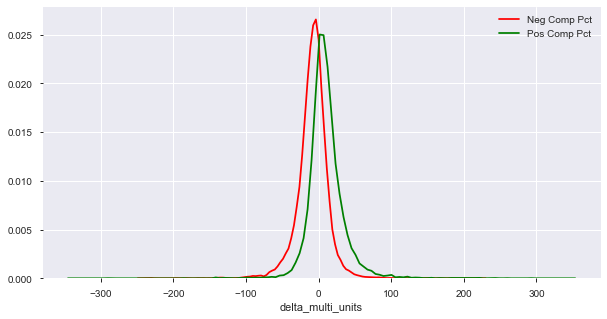

In [37]:
plt.subplots(figsize=(10,5))

sns.distplot(neg_df_delta['delta_multi_units'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_multi_units'],color='g',hist=False,label='Pos Comp Pct');

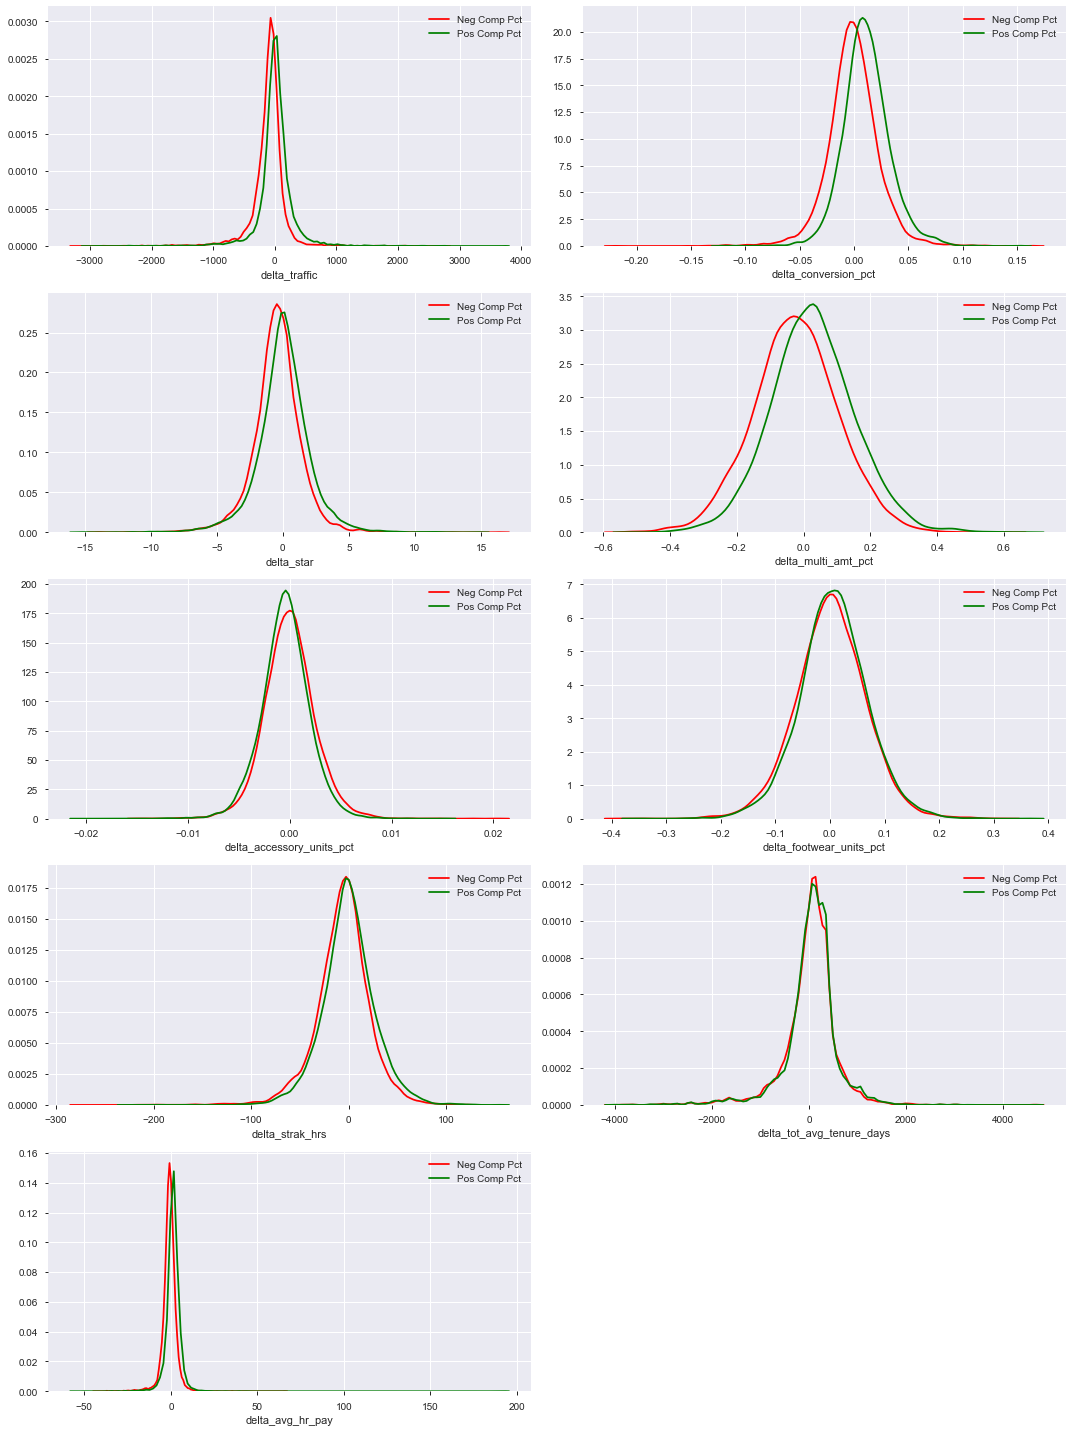

In [132]:
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_df_delta['delta_traffic'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_traffic'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,2)
sns.distplot(neg_df_delta['delta_conversion_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_conversion_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,3)
sns.distplot(neg_df_delta['delta_star'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_star'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,4)
sns.distplot(neg_df_delta['delta_multi_amt_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_multi_amt_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,5)
sns.distplot(neg_df_delta['delta_accessory_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_accessory_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,6)
sns.distplot(neg_df_delta['delta_footwear_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_footwear_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,7)
sns.distplot(neg_df_delta['delta_strak_hrs'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_strak_hrs'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,8)
sns.distplot(neg_df_delta['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,9)
sns.distplot(neg_df_delta['delta_avg_hr_pay'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta['delta_avg_hr_pay'],color='g',hist=False,label='Pos Comp Pct')

plt.tight_layout();

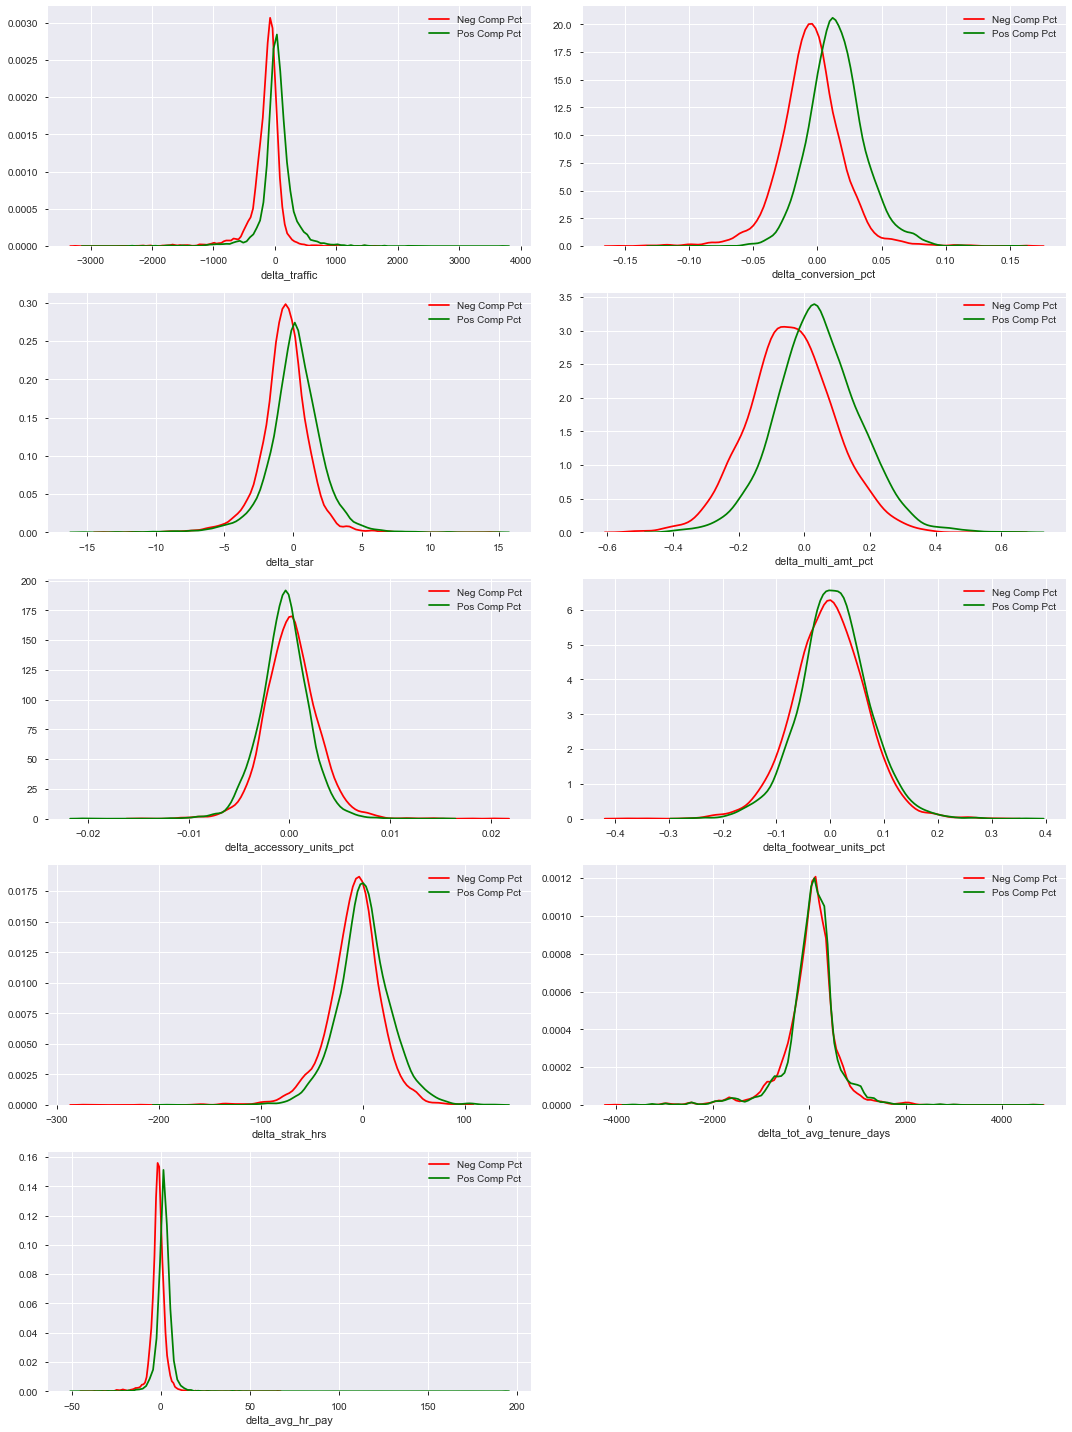

In [133]:
#top and bottom 50 percent
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_df_delta_50['delta_traffic'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_traffic'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,2)
sns.distplot(neg_df_delta_50['delta_conversion_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_conversion_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,3)
sns.distplot(neg_df_delta_50['delta_star'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_star'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,4)
sns.distplot(neg_df_delta_50['delta_multi_amt_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_multi_amt_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,5)
sns.distplot(neg_df_delta_50['delta_accessory_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_accessory_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,6)
sns.distplot(neg_df_delta_50['delta_footwear_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_footwear_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,7)
sns.distplot(neg_df_delta_50['delta_strak_hrs'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_strak_hrs'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,8)
sns.distplot(neg_df_delta_50['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,9)
sns.distplot(neg_df_delta_50['delta_avg_hr_pay'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_50['delta_avg_hr_pay'],color='g',hist=False,label='Pos Comp Pct');

plt.tight_layout();

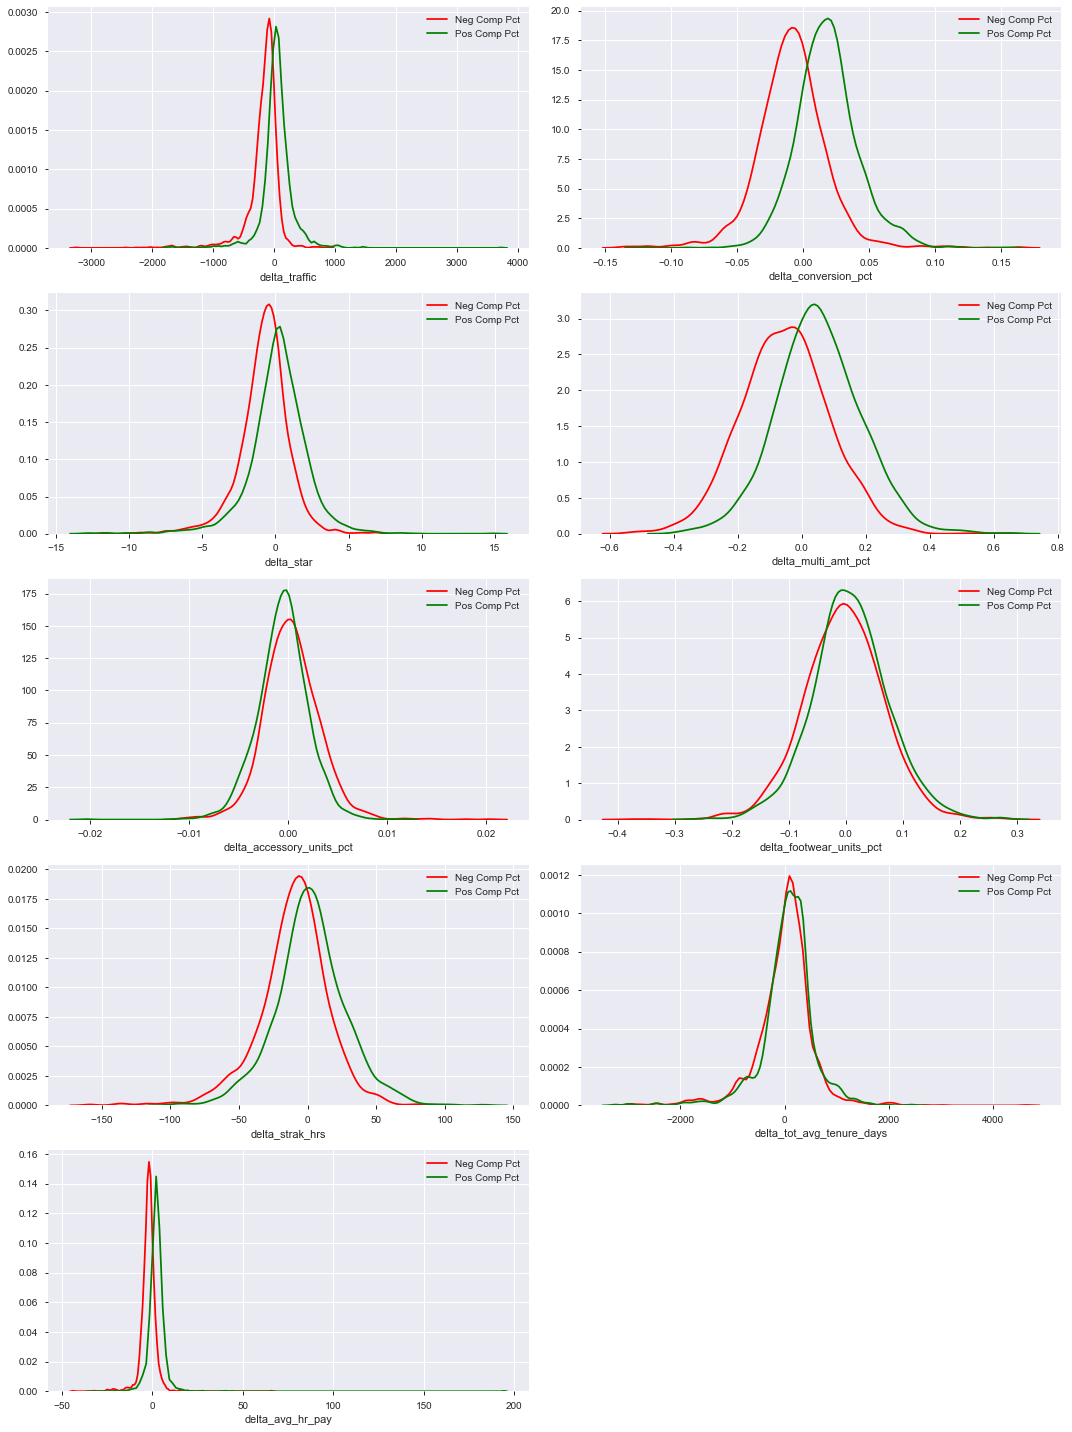

In [134]:
#top and bottom 25 percent
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_df_delta_25['delta_traffic'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_traffic'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,2)
sns.distplot(neg_df_delta_25['delta_conversion_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_conversion_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,3)
sns.distplot(neg_df_delta_25['delta_star'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_star'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,4)
sns.distplot(neg_df_delta_25['delta_multi_amt_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_multi_amt_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,5)
sns.distplot(neg_df_delta_25['delta_accessory_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_accessory_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,6)
sns.distplot(neg_df_delta_25['delta_footwear_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_footwear_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,7)
sns.distplot(neg_df_delta_25['delta_strak_hrs'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_strak_hrs'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,8)
sns.distplot(neg_df_delta_25['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,9)
sns.distplot(neg_df_delta_25['delta_avg_hr_pay'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_25['delta_avg_hr_pay'],color='g',hist=False,label='Pos Comp Pct');

plt.tight_layout();

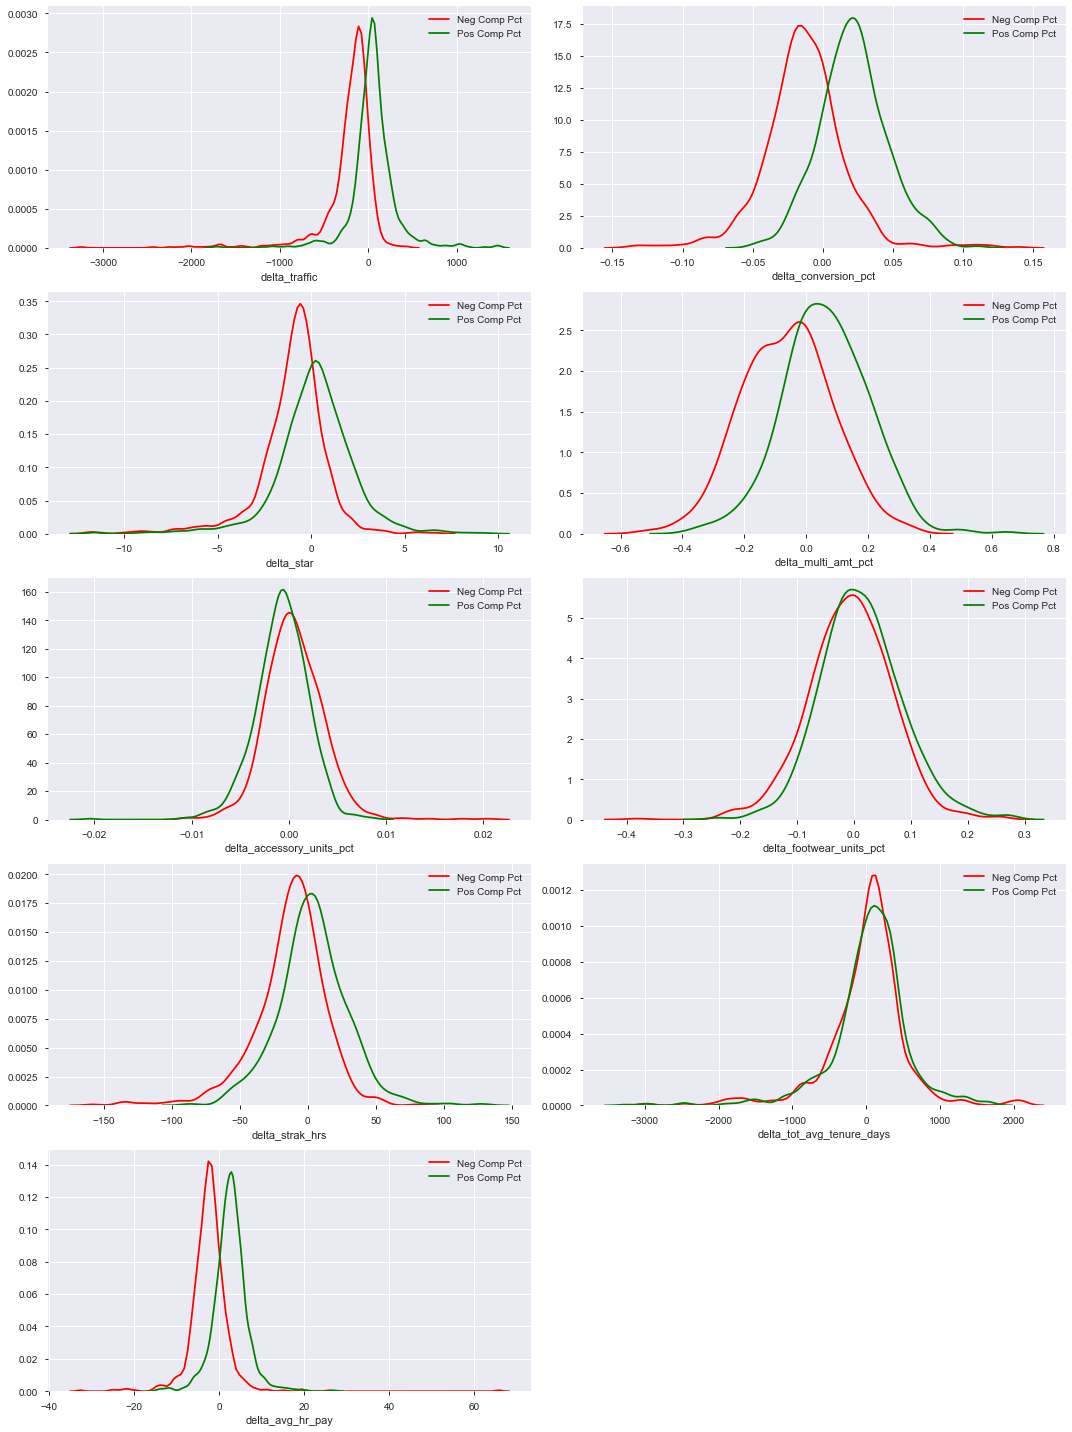

In [135]:
#top and bottom 10 percent
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_df_delta_10['delta_traffic'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_traffic'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,2)
sns.distplot(neg_df_delta_10['delta_conversion_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_conversion_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,3)
sns.distplot(neg_df_delta_10['delta_star'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_star'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,4)
sns.distplot(neg_df_delta_10['delta_multi_amt_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_multi_amt_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,5)
sns.distplot(neg_df_delta_10['delta_accessory_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_accessory_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,6)
sns.distplot(neg_df_delta_10['delta_footwear_units_pct'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_footwear_units_pct'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,7)
sns.distplot(neg_df_delta_10['delta_strak_hrs'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_strak_hrs'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,8)
sns.distplot(neg_df_delta_10['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,9)
sns.distplot(neg_df_delta_10['delta_avg_hr_pay'],color='r',hist=False,label='Neg Comp Pct')
sns.distplot(pos_df_delta_10['delta_avg_hr_pay'],color='g',hist=False,label='Pos Comp Pct');

plt.tight_layout();

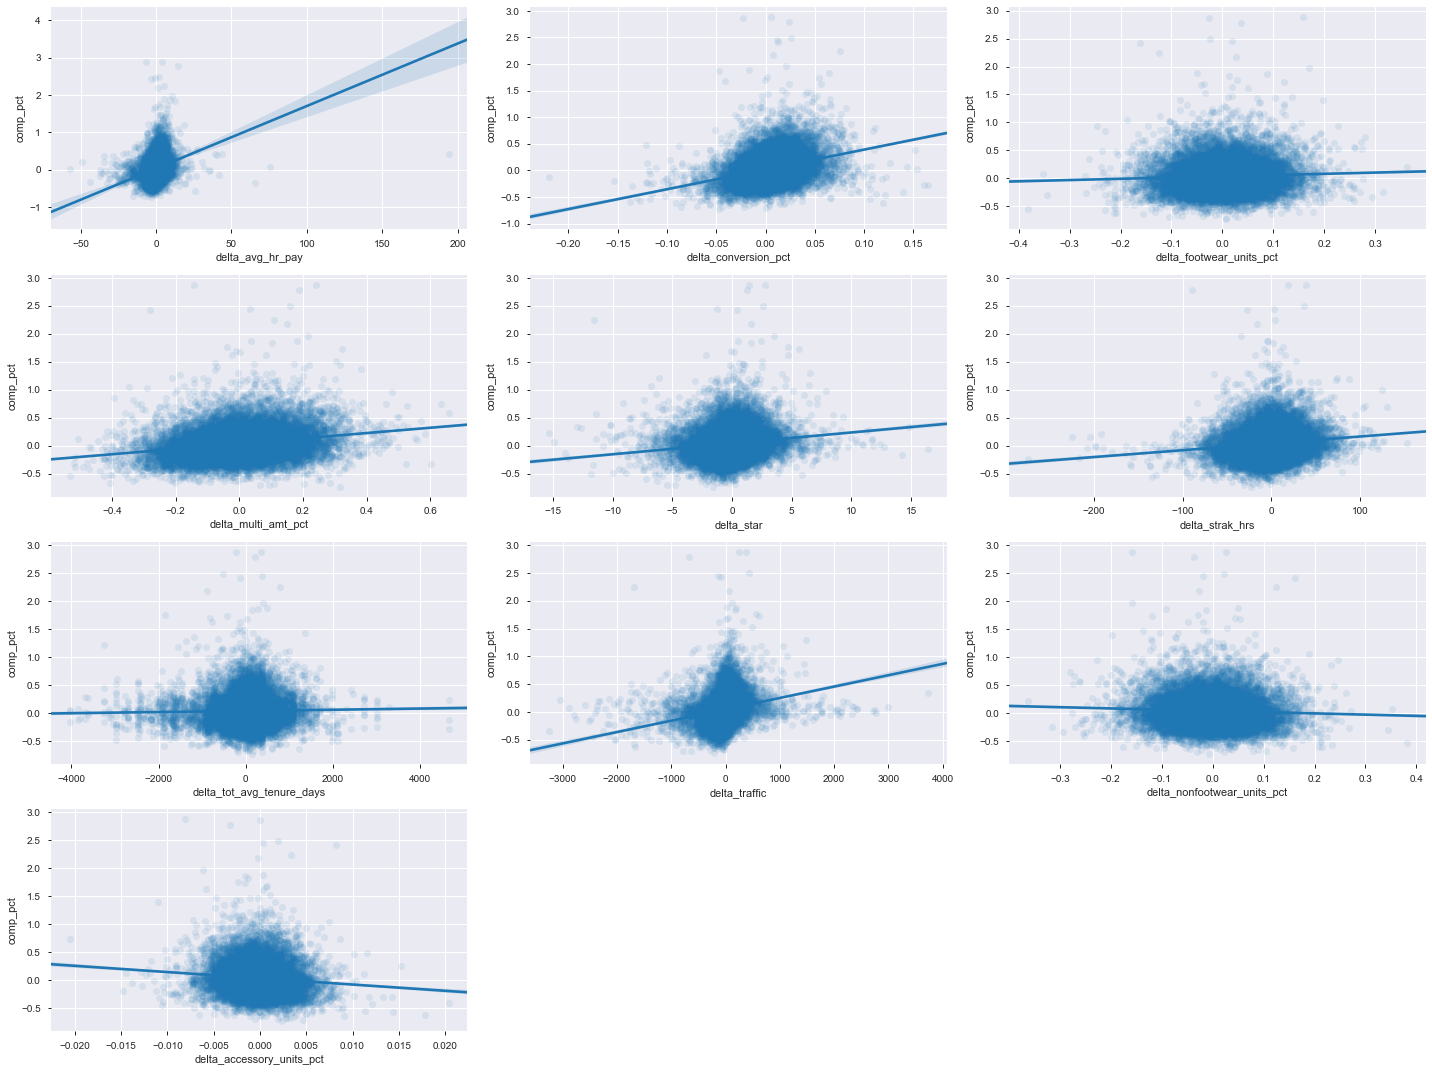

In [105]:
plt.subplots(figsize=(20,15))
plt.subplot(4,3,1)
sns.regplot(x='delta_avg_hr_pay',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,2)
sns.regplot(x='delta_conversion_pct',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,3)
sns.regplot(x='delta_footwear_units_pct',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,4)
sns.regplot(x='delta_multi_amt_pct',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,5)
sns.regplot(x='delta_star',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,6)
sns.regplot(x='delta_strak_hrs',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,7)
sns.regplot(x='delta_tot_avg_tenure_days',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,8)
sns.regplot(x='delta_traffic',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,9)
sns.regplot(x='delta_nonfootwear_units_pct',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1});

plt.subplot(4,3,10)
sns.regplot(x='delta_accessory_units_pct',y='comp_pct',data=df_delta,scatter_kws={'alpha':0.1})

plt.tight_layout();

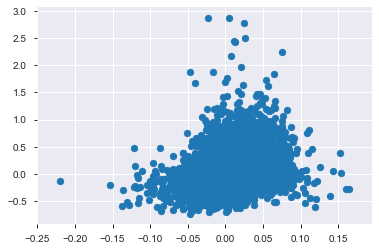

In [83]:
plt.scatter(x=df_delta.delta_conversion_pct,y=df_delta.comp_pct)

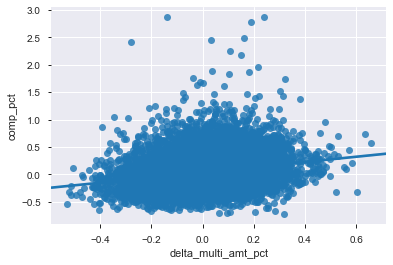

In [53]:
sns.regplot(x='delta_multi_amt_pct',y='comp_pct',data=df_delta);

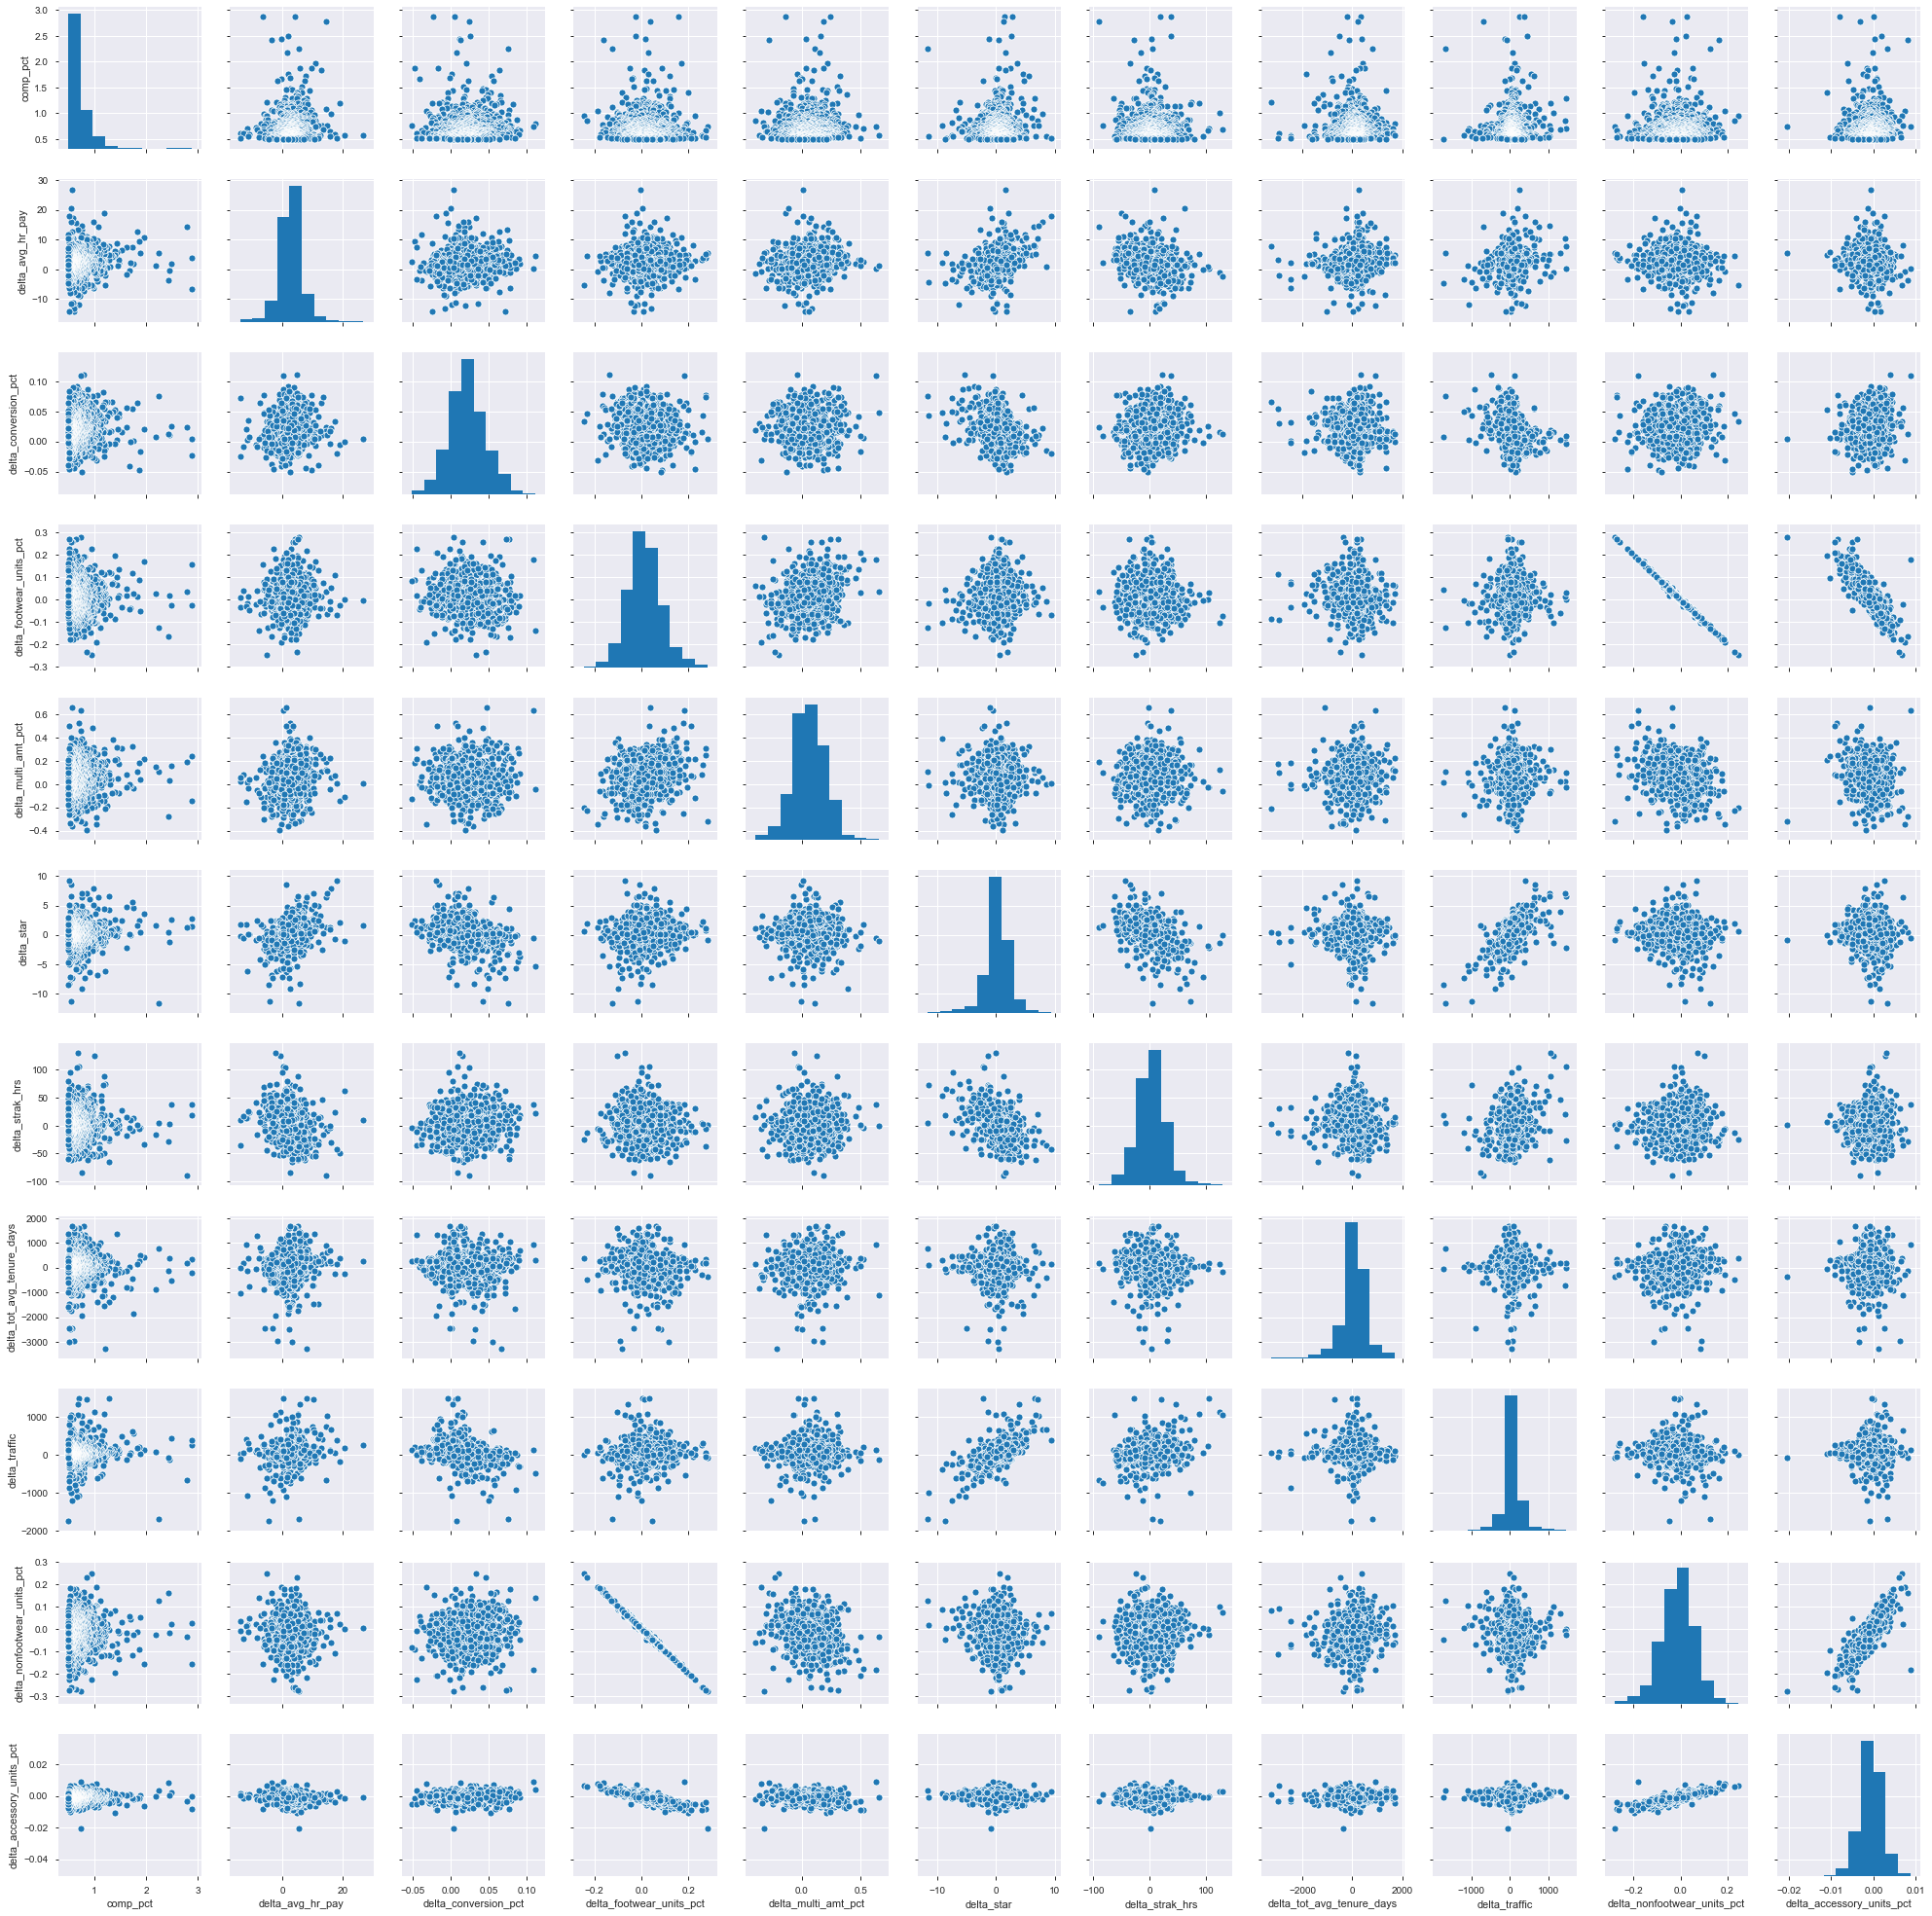

In [131]:
sns.pairplot(pos_df_delta_10);

In [138]:
pos_conv_delta=df_delta[df_delta['delta_conversion_pct']>=0]
neg_conv_delta=df_delta[df_delta['delta_conversion_pct']<0]

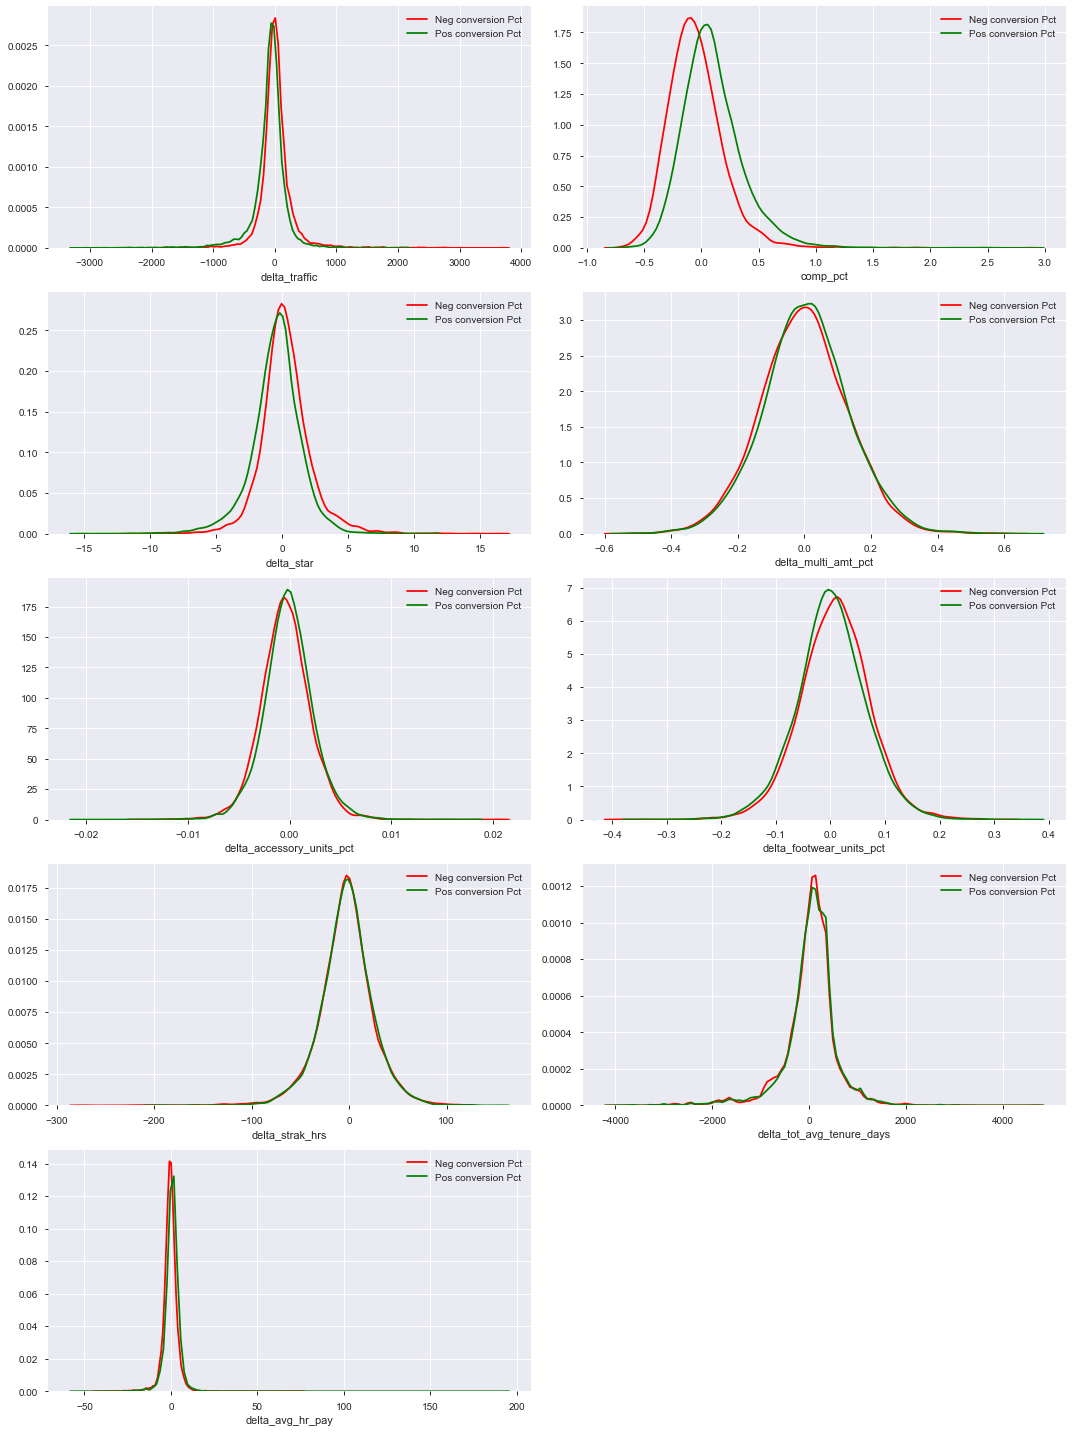

In [152]:
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_conv_delta['delta_traffic'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_traffic'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,2)
sns.distplot(neg_conv_delta['comp_pct'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['comp_pct'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,3)
sns.distplot(neg_conv_delta['delta_star'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_star'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,4)
sns.distplot(neg_conv_delta['delta_multi_amt_pct'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_multi_amt_pct'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,5)
sns.distplot(neg_conv_delta['delta_accessory_units_pct'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_accessory_units_pct'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,6)
sns.distplot(neg_conv_delta['delta_footwear_units_pct'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_footwear_units_pct'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,7)
sns.distplot(neg_conv_delta['delta_strak_hrs'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_strak_hrs'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,8)
sns.distplot(neg_conv_delta['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos conversion Pct')
plt.subplot(5,2,9)
sns.distplot(neg_conv_delta['delta_avg_hr_pay'],color='r',hist=False,label='Neg conversion Pct')
sns.distplot(pos_conv_delta['delta_avg_hr_pay'],color='g',hist=False,label='Pos conversion Pct')

plt.tight_layout();

In [145]:
pos_mult_delta=df_delta[df_delta['delta_multi_amt_pct']>=0]
neg_mult_delta=df_delta[df_delta['delta_multi_amt_pct']<0]

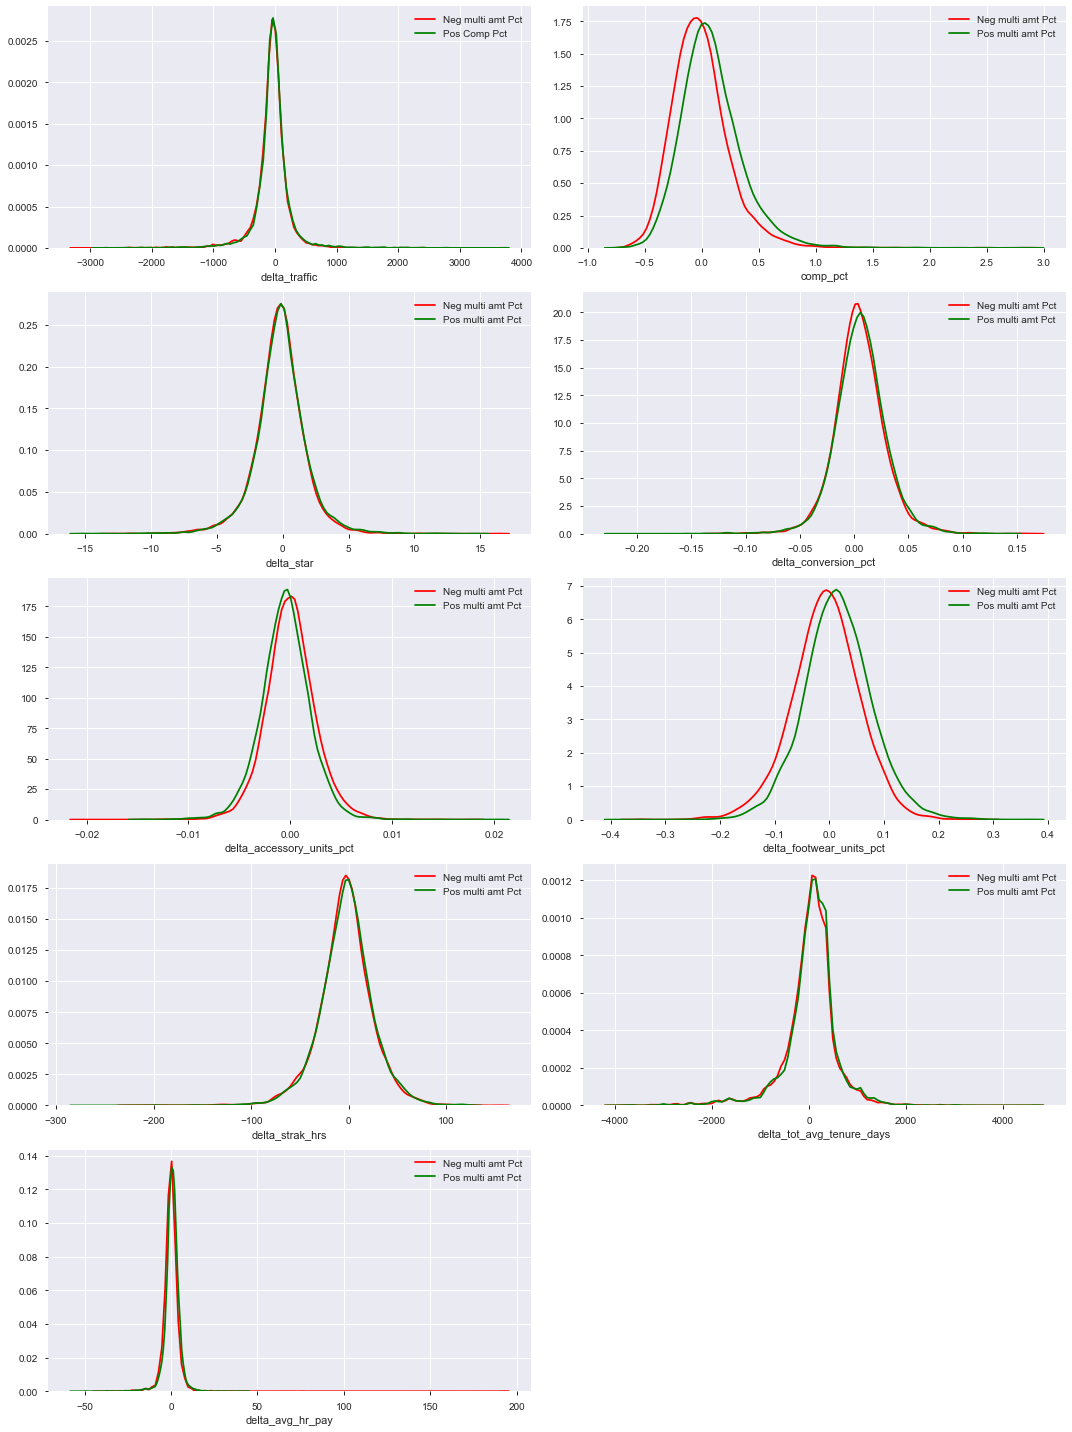

In [153]:
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_mult_delta['delta_traffic'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_traffic'],color='g',hist=False,label='Pos Comp Pct')
plt.subplot(5,2,2)
sns.distplot(neg_mult_delta['comp_pct'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['comp_pct'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,3)
sns.distplot(neg_mult_delta['delta_star'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_star'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,4)
sns.distplot(neg_mult_delta['delta_conversion_pct'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_conversion_pct'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,5)
sns.distplot(neg_mult_delta['delta_accessory_units_pct'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_accessory_units_pct'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,6)
sns.distplot(neg_mult_delta['delta_footwear_units_pct'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_footwear_units_pct'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,7)
sns.distplot(neg_mult_delta['delta_strak_hrs'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_strak_hrs'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,8)
sns.distplot(neg_mult_delta['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos multi amt Pct')
plt.subplot(5,2,9)
sns.distplot(neg_mult_delta['delta_avg_hr_pay'],color='r',hist=False,label='Neg multi amt Pct')
sns.distplot(pos_mult_delta['delta_avg_hr_pay'],color='g',hist=False,label='Pos multi amt Pct')

plt.tight_layout();

In [148]:
pos_traffic_delta=df_delta[df_delta['delta_traffic']>=0]
neg_traffic_delta=df_delta[df_delta['delta_traffic']<0]

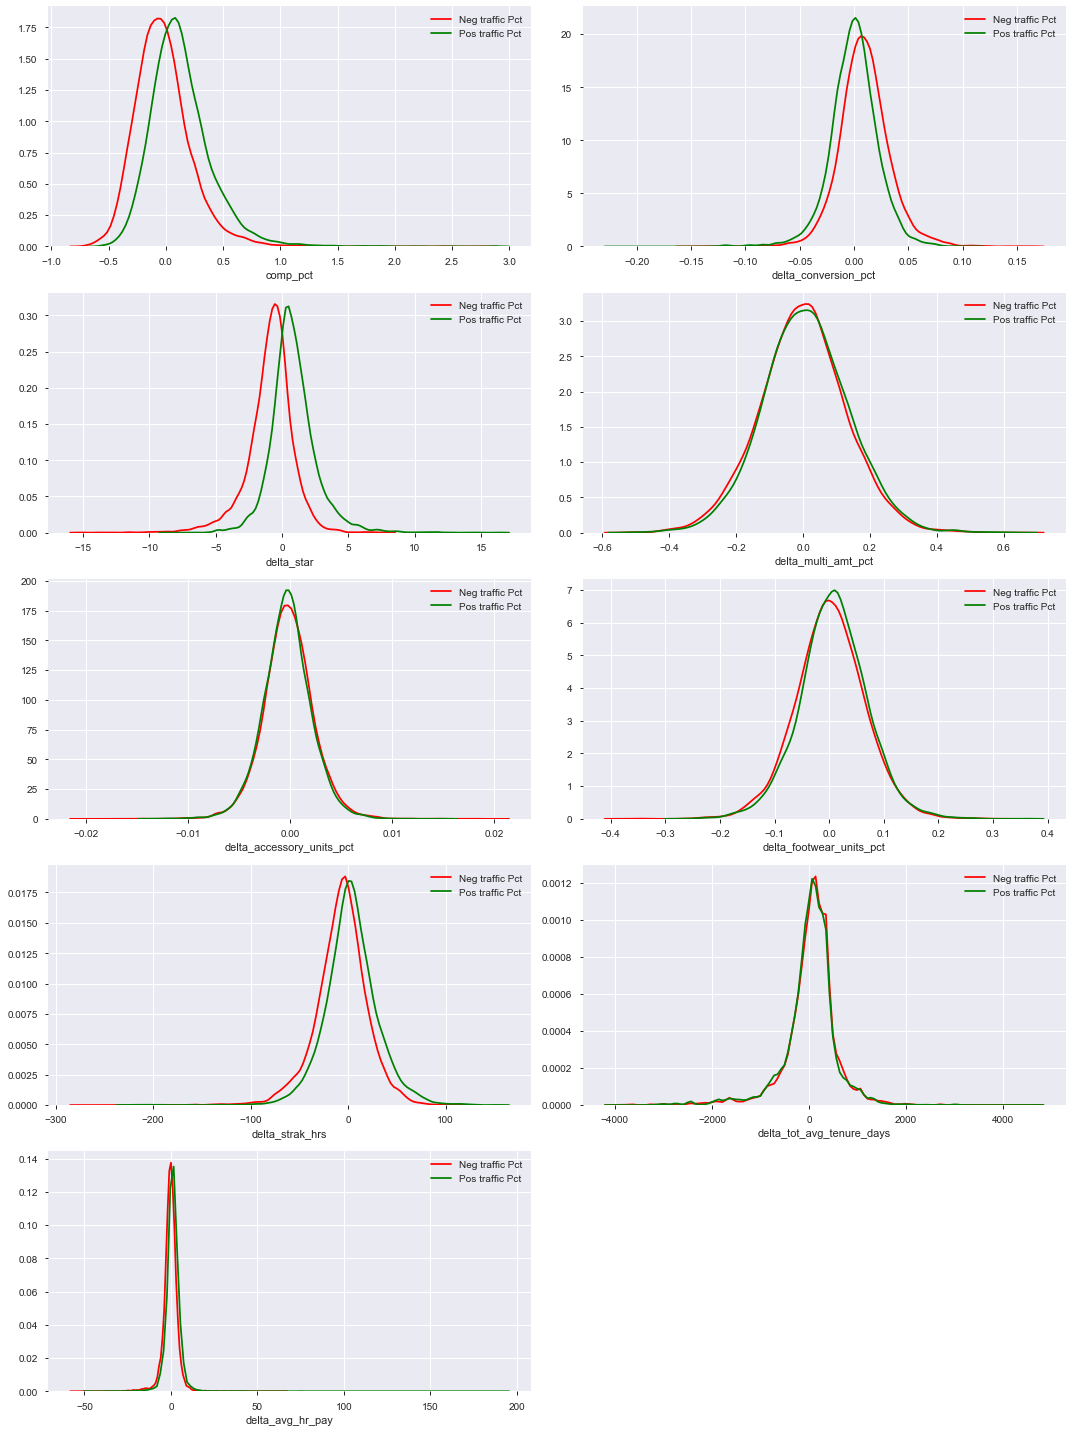

In [154]:
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_traffic_delta['comp_pct'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['comp_pct'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,2)
sns.distplot(neg_traffic_delta['delta_conversion_pct'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_conversion_pct'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,3)
sns.distplot(neg_traffic_delta['delta_star'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_star'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,4)
sns.distplot(neg_traffic_delta['delta_multi_amt_pct'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_multi_amt_pct'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,5)
sns.distplot(neg_traffic_delta['delta_accessory_units_pct'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_accessory_units_pct'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,6)
sns.distplot(neg_traffic_delta['delta_footwear_units_pct'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_footwear_units_pct'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,7)
sns.distplot(neg_traffic_delta['delta_strak_hrs'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_strak_hrs'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,8)
sns.distplot(neg_traffic_delta['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos traffic Pct')
plt.subplot(5,2,9)
sns.distplot(neg_traffic_delta['delta_avg_hr_pay'],color='r',hist=False,label='Neg traffic Pct')
sns.distplot(pos_traffic_delta['delta_avg_hr_pay'],color='g',hist=False,label='Pos traffic Pct')

plt.tight_layout();

In [150]:
pos_star_delta=df_delta[df_delta['delta_star']>=0]
neg_star_delta=df_delta[df_delta['delta_star']<0]

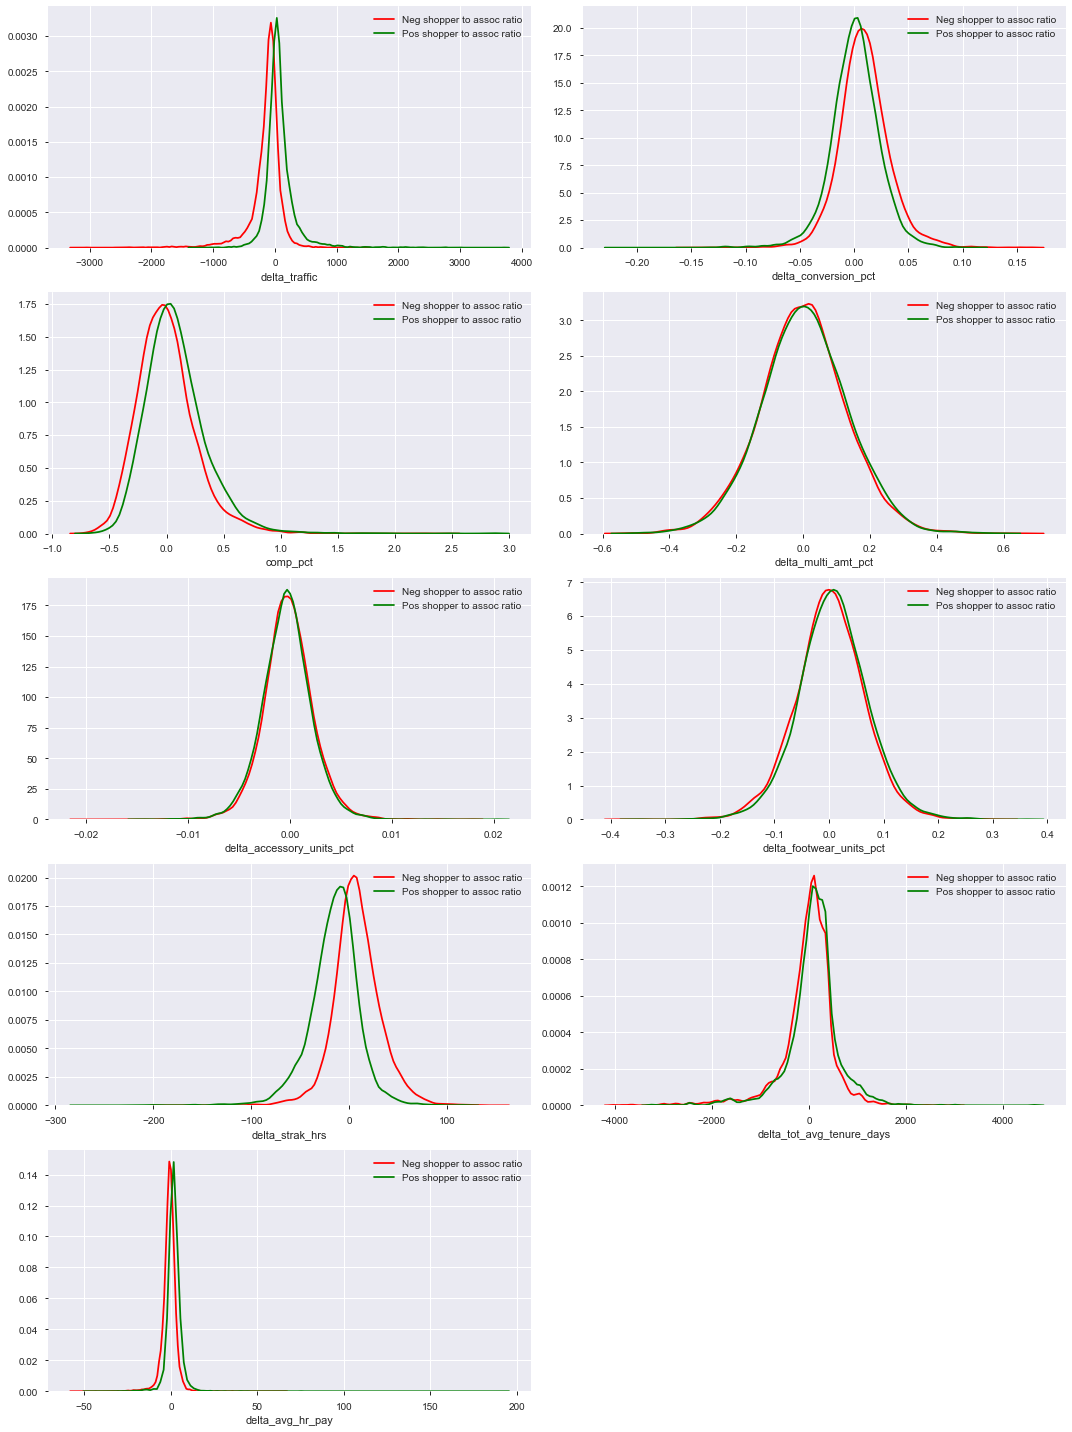

In [155]:
plt.subplots(figsize=(15,20))


plt.subplot(5,2,1)
sns.distplot(neg_star_delta['delta_traffic'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_traffic'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,2)
sns.distplot(neg_star_delta['delta_conversion_pct'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_conversion_pct'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,3)
sns.distplot(neg_star_delta['comp_pct'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['comp_pct'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,4)
sns.distplot(neg_star_delta['delta_multi_amt_pct'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_multi_amt_pct'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,5)
sns.distplot(neg_star_delta['delta_accessory_units_pct'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_accessory_units_pct'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,6)
sns.distplot(neg_star_delta['delta_footwear_units_pct'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_footwear_units_pct'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,7)
sns.distplot(neg_star_delta['delta_strak_hrs'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_strak_hrs'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,8)
sns.distplot(neg_star_delta['delta_tot_avg_tenure_days'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_tot_avg_tenure_days'],color='g',hist=False,label='Pos shopper to assoc ratio')
plt.subplot(5,2,9)
sns.distplot(neg_star_delta['delta_avg_hr_pay'],color='r',hist=False,label='Neg shopper to assoc ratio')
sns.distplot(pos_star_delta['delta_avg_hr_pay'],color='g',hist=False,label='Pos shopper to assoc ratio')

plt.tight_layout();